<a href="https://colab.research.google.com/github/nmuraro/entregables/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


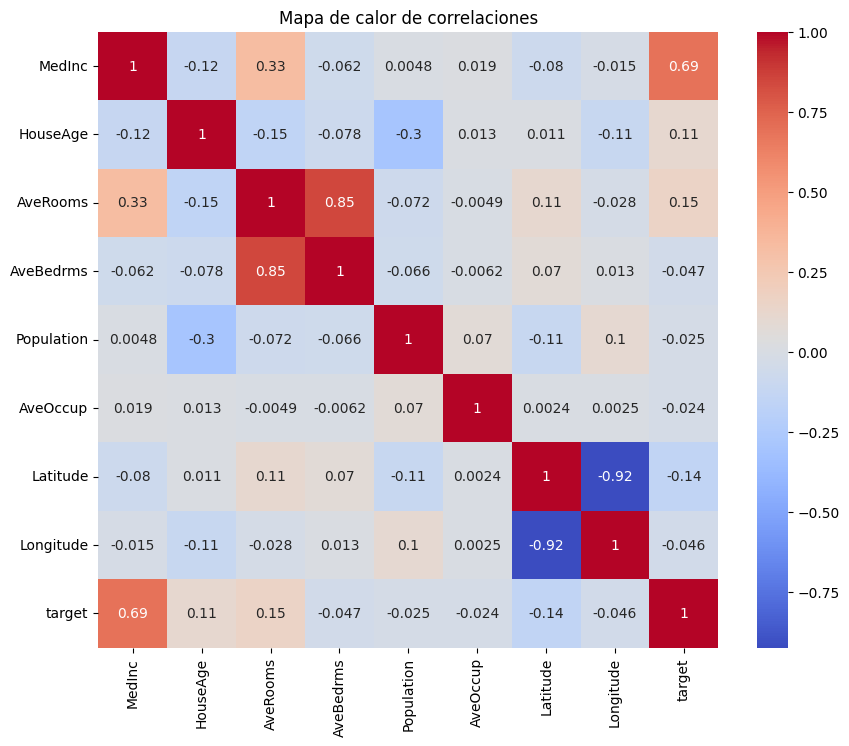

,mae,mse,rmse,mape,smape
0,0.5332,0.5559,0.7456,31.9522,0.4843


In [ ]:
# Análisis estadístico descriptivo
housing.describe()

# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing.drop('target', axis=1)
y = housing['target']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar modelo de regresión (ej: LinearRegression)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluar con la función regression_metrics
df_result_lr = pd.DataFrame({'y': y_test, 'yhat': y_pred_lr})
regression_metrics(df_result_lr)


# Conclusión
La variable con mayor correlación con el valor de la propiedad es el ingreso medio (MedInc), con una correlación de 0.69.
El modelo de regresión lineal simple presenta un RMSE de 0.7456, lo que indica un ajuste moderado.
Para mejorar el modelo, se podrían probar otros algoritmos como Random Forest, Ridge o Decision Tree.


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [ ]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Tipos de datos:
int64    65
Name: count, dtype: int64

Uso de memoria:
934572 bytes

Distribución de clases (target):
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


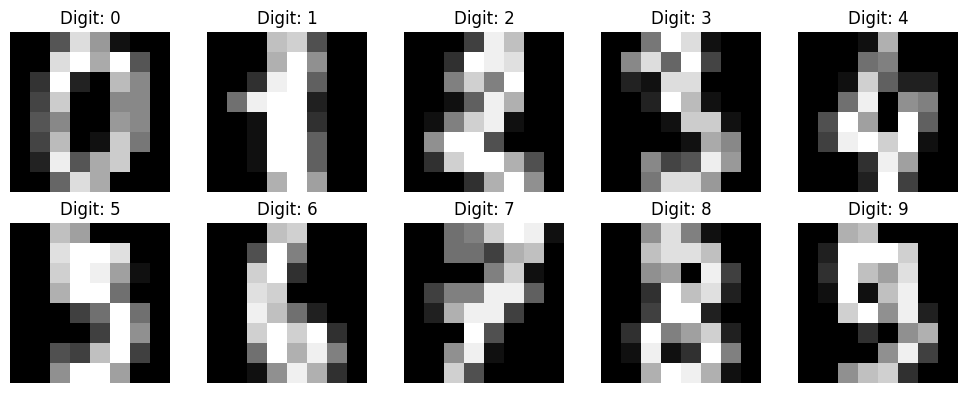

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Cargar datos
digits_dict = datasets.load_digits()
digits = (
    pd.DataFrame(digits_dict["data"])
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

# Tipos de datos
print("Tipos de datos:")
print(digits.dtypes.value_counts())

# Memoria usada
print("\nUso de memoria:")
print(digits.memory_usage(deep=True).sum(), "bytes")

# Clases disponibles y su distribución
print("\nDistribución de clases (target):")
print(digits["target"].value_counts().sort_index())

# Visualización de 10 dígitos aleatorios
plt.figure(figsize=(10, 4))
for i, (img, label) in enumerate(zip(digits_dict["images"][:10], digits_dict["target"][:10])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [ ]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

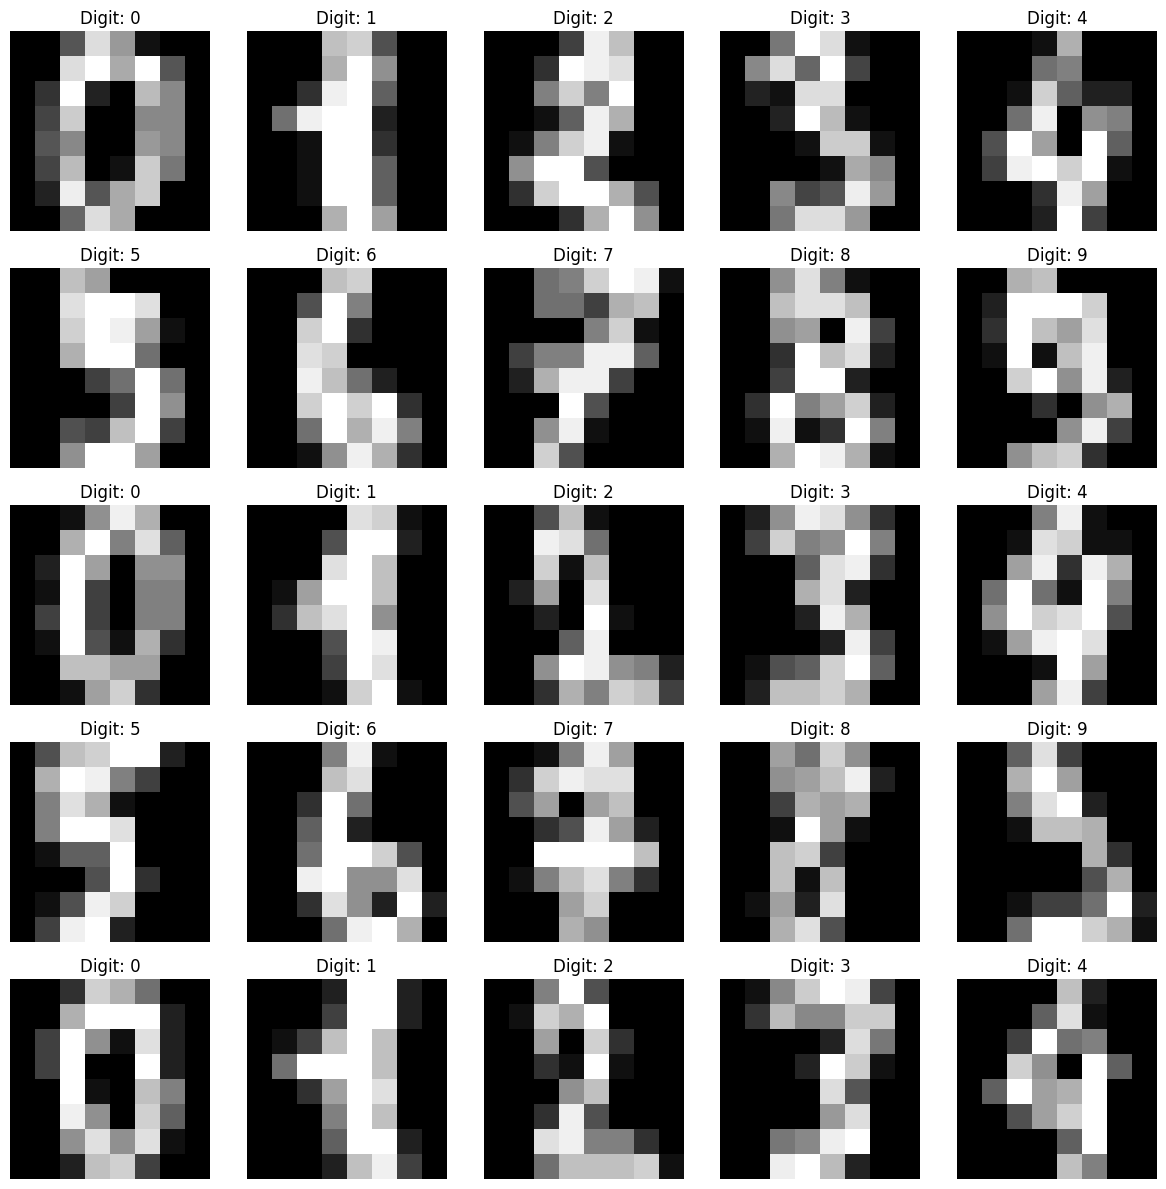

In [ ]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

# Mostrar las primeras 25 imágenes
for i in range(nx * ny):
    ax = axs[i // ny, i % ny]  # obtener el eje correspondiente
    ax.imshow(digits_dict["images"][i], cmap="gray")  # imagen (8x8)
    ax.set_title(f"Digit: {digits_dict['target'][i]}")  # título con la etiqueta
    ax.axis("off")  # sin ejes

plt.tight_layout()
plt.show()



### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [ ]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de test:", len(X_test))


Tamaño del conjunto de entrenamiento: 1437
Tamaño del conjunto de test: 360


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

def evaluar_modelo(modelo, nombre):
    print(f"\n🔍 Evaluando modelo: {nombre}")
    t0 = time.time()
    modelo.fit(X_train, y_train)
    t1 = time.time()

    tiempo_entrenamiento = t1 - t0
    print(f"⏱️ Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")

    y_pred = modelo.predict(X_test)

    print("📊 Reporte de métricas:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict["target_names"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

    return tiempo_entrenamiento



🔍 Evaluando modelo: Regresión Logística
⏱️ Tiempo de entrenamiento: 0.8882 segundos
📊 Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



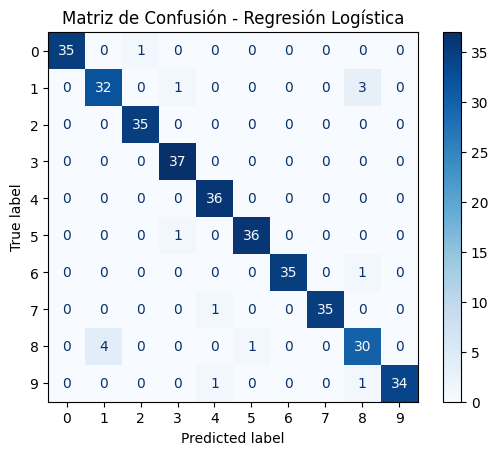


🔍 Evaluando modelo: K-Nearest Neighbors (K=3)
⏱️ Tiempo de entrenamiento: 0.0016 segundos
📊 Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



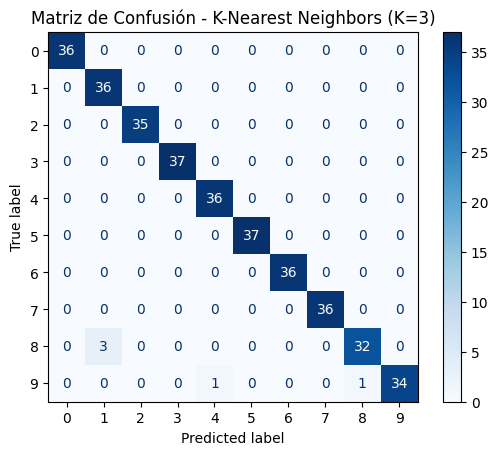


🔍 Evaluando modelo: Random Forest
⏱️ Tiempo de entrenamiento: 0.4522 segundos
📊 Reporte de métricas:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



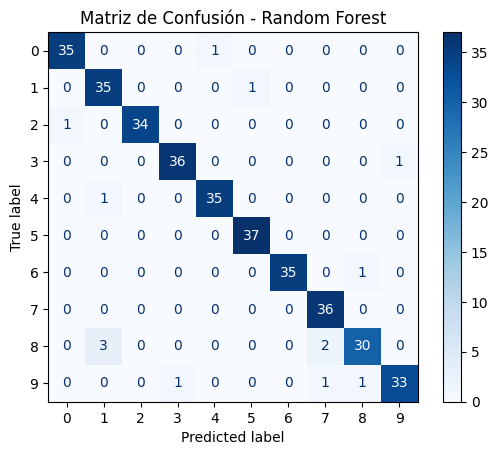

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística
modelo_log = LogisticRegression(max_iter=1000, solver='lbfgs')
tiempo_log = evaluar_modelo(modelo_log, "Regresión Logística")

# Modelo 2: K-Nearest Neighbors
modelo_knn = KNeighborsClassifier(n_neighbors=3)
tiempo_knn = evaluar_modelo(modelo_knn, "K-Nearest Neighbors (K=3)")

# Modelo 3: Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
tiempo_rf = evaluar_modelo(modelo_rf, "Random Forest")


¿Cuál modelo es mejor basado en sus métricas?
Podemos observar que el modelo KNN es el que presenta la mejor precisión, puesto que muestra el mayor Acurrancy.
¿Cuál modelo demora menos tiempo en ajustarse?
del mismo modo, es el que presenta menor tiempo necesario para ajustarse.
¿Qué modelo escoges?

Después de evaluar los tres modelos, se concluye que el mejor desempeño lo obtiene el modelo **K-Nearest Neighbors (K=3)**, alcanzando una precisión del 99%. Además, es el más rápido en términos de tiempo de entrenamiento. Por lo tanto, se recomienda utilizar este modelo para la tarea de clasificación de dígitos manuscritos en este conjunto de datos.


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

/tmp/ipython-input-4193902947.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


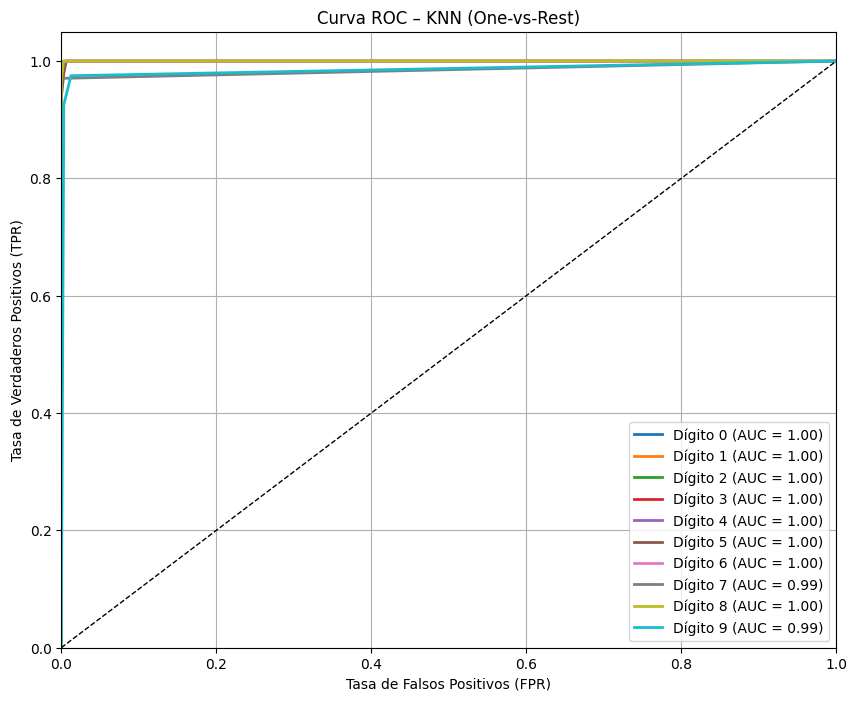

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# 1. Cargar datos
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 2. Binarizar las etiquetas para multiclase
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# 3. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# 4. Entrenar KNN en esquema One-vs-Rest
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)

# 5. Calcular curva ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Graficar
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Dígito {i} (AUC = {roc_auc[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC – KNN (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


a curva ROC-AUC obtenida para el modelo KNN (K=3), bajo una estrategia One-vs-Rest, muestra un buen desempeño. Todas las clases (dígitos del 0 al 9) alcanzan valores de AUC cercanos a 1.00, indicando que el modelo es capaz de diferenciar muy bien entre cada clase.

Este resultado confirma lo observado en el reporte de métricas (precisión, recall, f1-score) y refuerza la elección de KNN como el modelo más adecuado para el problema de clasificación de dígitos manuscritos en este dataset.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [ ]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.data
    y = digits.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

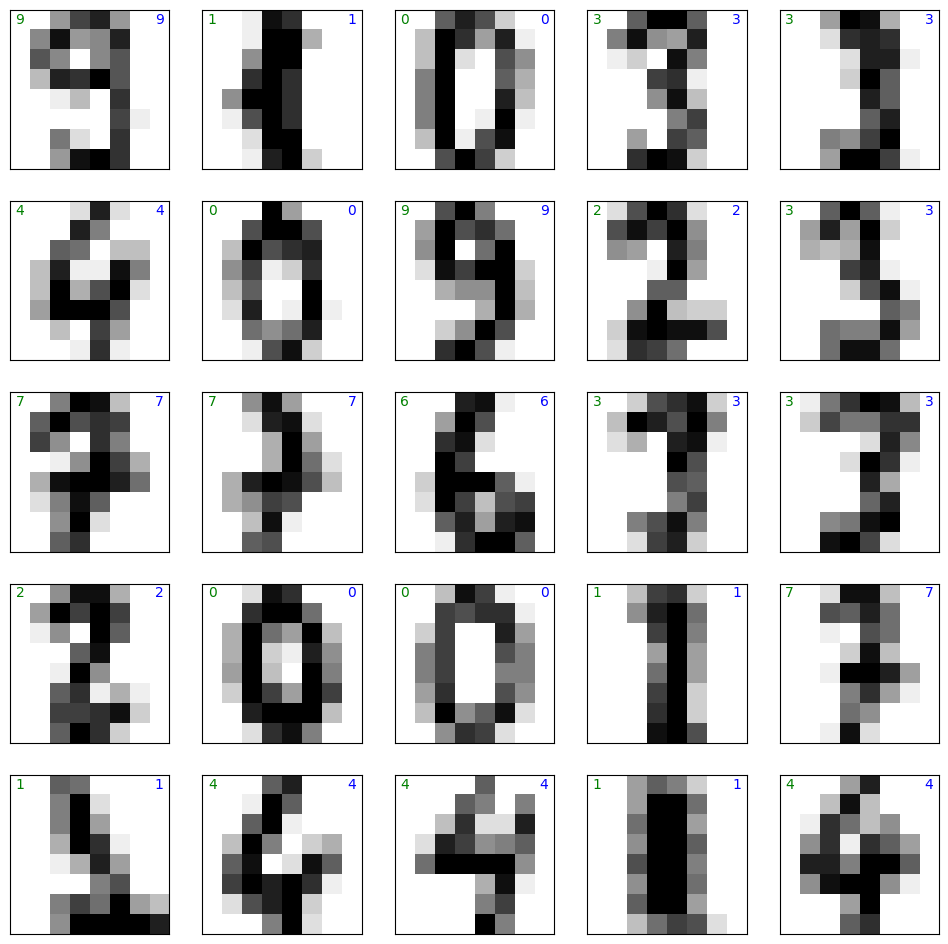

In [ ]:
# Usamos el mejor modelo
modelo_knn = KNeighborsClassifier(n_neighbors=3)

# Visualizamos aciertos
mostrar_resultados(digits, modelo_knn, label='correctos')


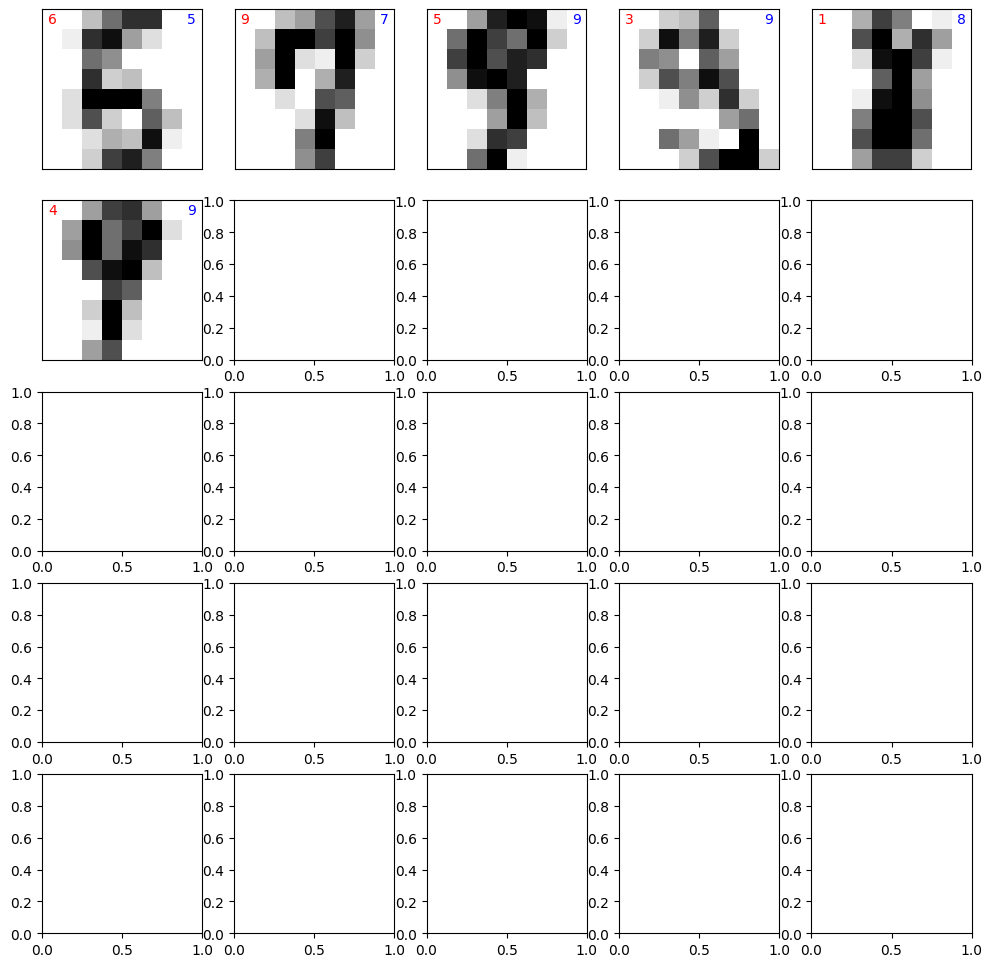

In [ ]:
# Visualizamos errores
mostrar_resultados(digits, modelo_knn, label='incorrectos')


Las fallas ocurren por varias razones típicas en problemas de clasificación de imágenes, las cuales pueden ser por ambigüedad visual, dado que algunos dígitos son difíciles de distinguir (por ejemplo, un “3” escrito de forma rara puede parecer un “8”). También, por la calidad del trazo: Algunas imágenes están mal definidas o borrosas (pixeles apagados, trazos incompletos, escritura irregular). Adicionalmente, el modelo sensible a ruido:
Aunque KNN tiene excelente rendimiento general, sigue siendo un método sensible a valores atípicos o dígitos poco comunes.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En este laboratorio se aplicaron técnicas de Machine Learning supervisado para regresión y clasificación. En la tarea de clasificación, se evaluaron tres modelos, destacando K-Nearest Neighbors (K=3) como el mejor, con 99% de accuracy y AUC cercano a 1.00 en todas las clases.

Este modelo fue rápido, preciso y generalizó muy bien. Los errores observados se explican por trazos ambiguos o poco claros en los dígitos del conjunto de datos.

Ahora, la recomendación para trabajos futuros puede ser la de evaluar el impacto de la normalización de features o uso de técnicas como PCA para reducción de dimensionalidad. También, probar modelos más avanzados como SVMs o Redes Neuronales.